# Installation of Pyspark

In [1]:
!pip install pyspark==3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 MB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.8/198.8 kB 8.7 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805891 sha256=4ae2ffbcf5402da6409db35c794501997ff33d6bddff5ce8b8b07ad1e5000677
  Stored in directory: /root/.cache/pip/wheels/32/97/d3/8b6d964c8700e4fbb561c71638a92ec55dac9be51eb5fea86d
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


# Import libraries

In [2]:
#Import neccessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns    

# Loading the Dataset 

In [3]:
#load the dataset
df = pd.read_csv('/kaggle/input/nvdadataset/nvdaData.csv')
df.head()


,Date,Close/Last
0,12/16/2024,$132.00
1,12/13/2024,$134.25
2,12/12/2024,$137.34
3,12/11/2024,$139.31
4,12/10/2024,$135.07


# Pre-process

In [4]:
# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])


In [5]:
# convert the 'Close/Last' column to numeric and remove the dollar sign 
df['Close/Last'] = df['Close/Last'].str.strip('$,').astype(float)



In [6]:
df.tail()

,Date,Close/Last
1253,2019-12-23,5.9705
1254,2019-12-20,5.9843
1255,2019-12-19,5.8865
1256,2019-12-18,5.7378
1257,2019-12-17,5.7073


In [7]:
#set date column as the index
df.set_index('Date', inplace=True)

In [8]:
# resample the data to monthly frequency and calculate the mean
nvda = df.resample('MS').mean()

In [9]:
nvda.head()


,Close/Last
Date,
2019-12-01,5.884400
2020-01-01,6.120262
2020-02-01,6.773337
2020-03-01,6.088832
2020-04-01,6.924929


In [10]:
#Check for any missing values
nvda.isnull().sum()

Close/Last    0
dtype: int64

# Data Exploration

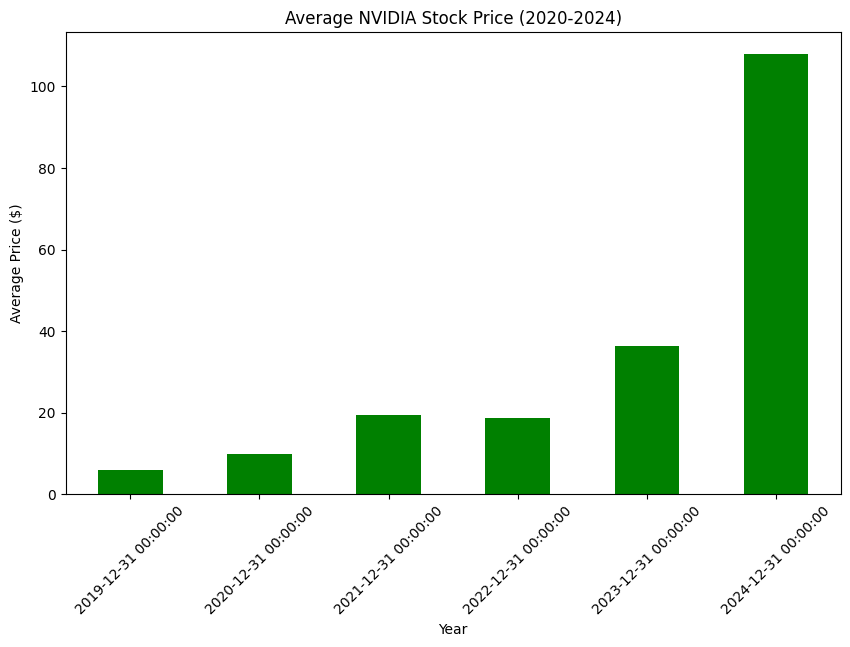

In [11]:
yearly_avg = nvda['Close/Last'].resample('Y').mean()
yearly_avg.plot(kind='bar', figsize=(10, 6), color='green', title='Average NVIDIA Stock Price (2020-2024)')
plt.xlabel('Year')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

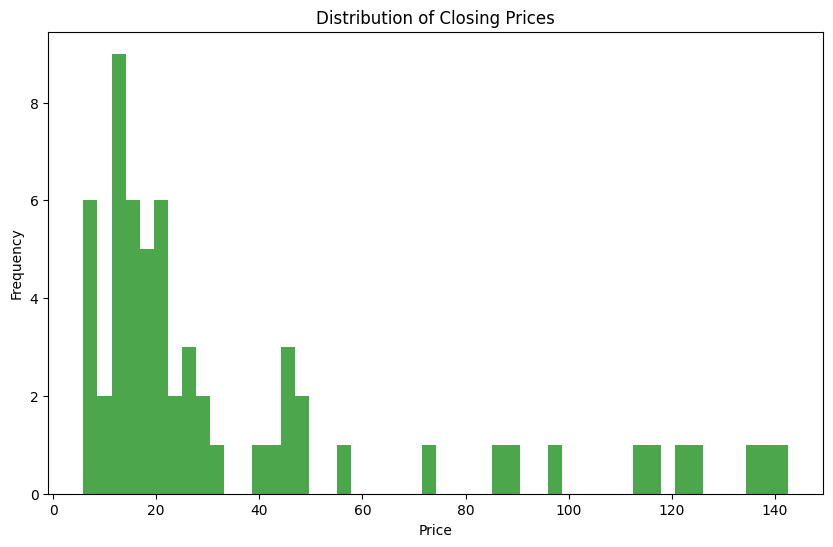

In [12]:
nvda['Close/Last'].plot(kind='hist', bins=50, alpha=0.7, title='Distribution of Closing Prices',color='green', figsize=(10, 6))
plt.xlabel('Price')
plt.show()

# Time-Series Decomposition

<function matplotlib.pyplot.show(close=None, block=None)>

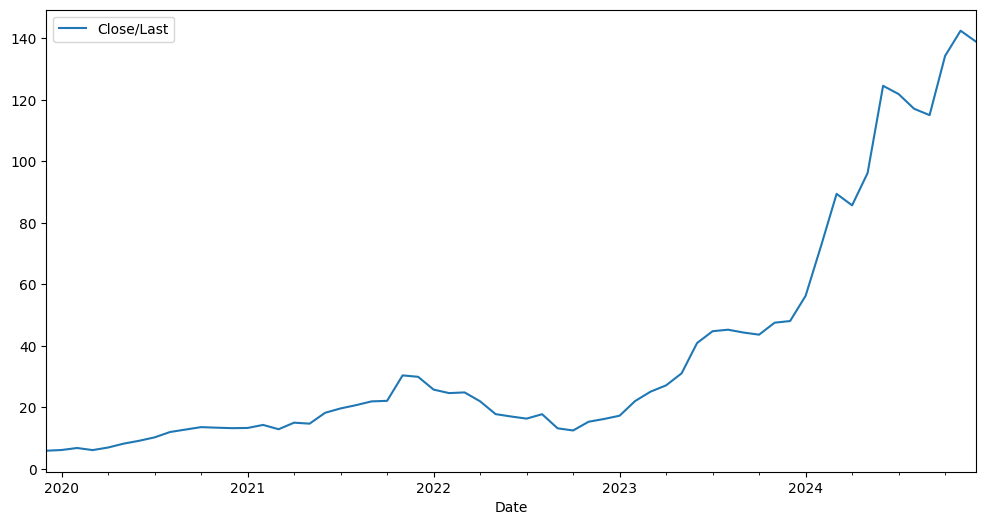

In [13]:
#plotting NVIDIA stock share price 
nvda.plot(figsize=(12,6))
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

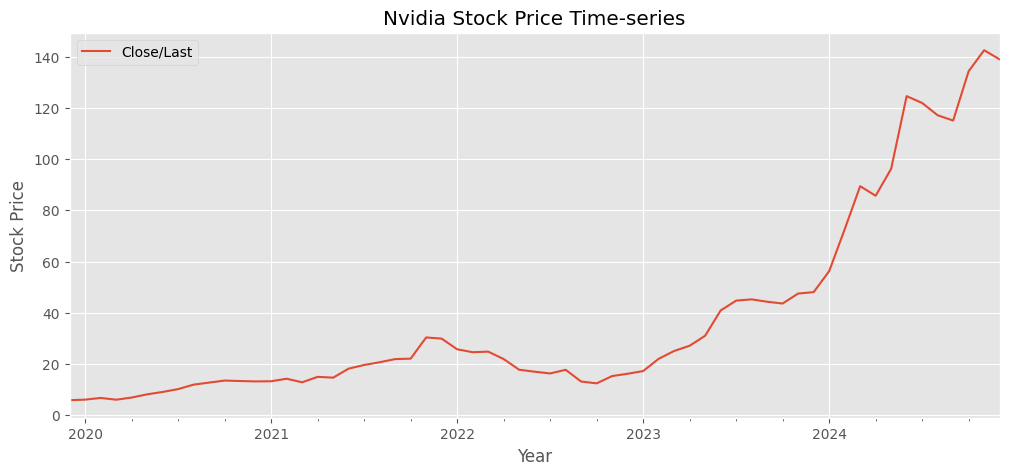

In [14]:
#plotting NVIDIA stock share price time series
plt.style.use('ggplot')
nvda.plot(figsize =(12,5))
plt.title('Nvidia Stock Price Time-series')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.legend(loc='best')
plt.show

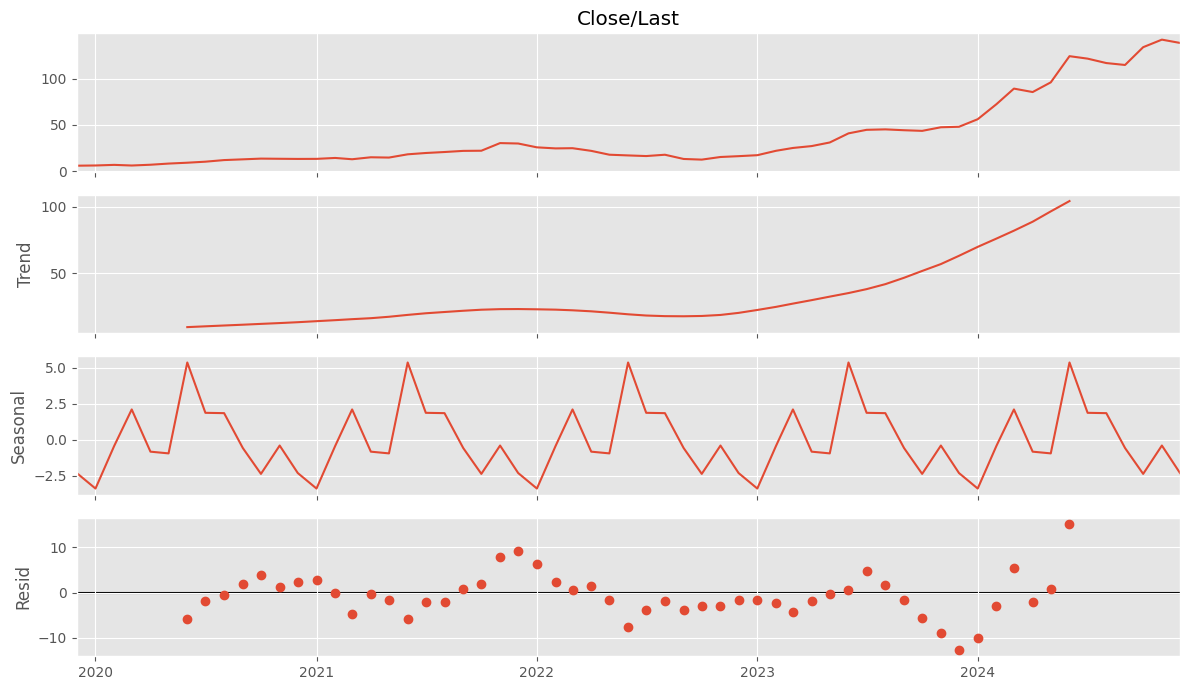

In [15]:
#Time Series Additive Decomposition 
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize'] = 12,7


additive_decompose = seasonal_decompose(nvda['Close/Last'],model = 'additive')
additive_decompose.plot()
plt.show()

#below 0 is under estimation, above 0 is over estimated
#residual is the error of estimation

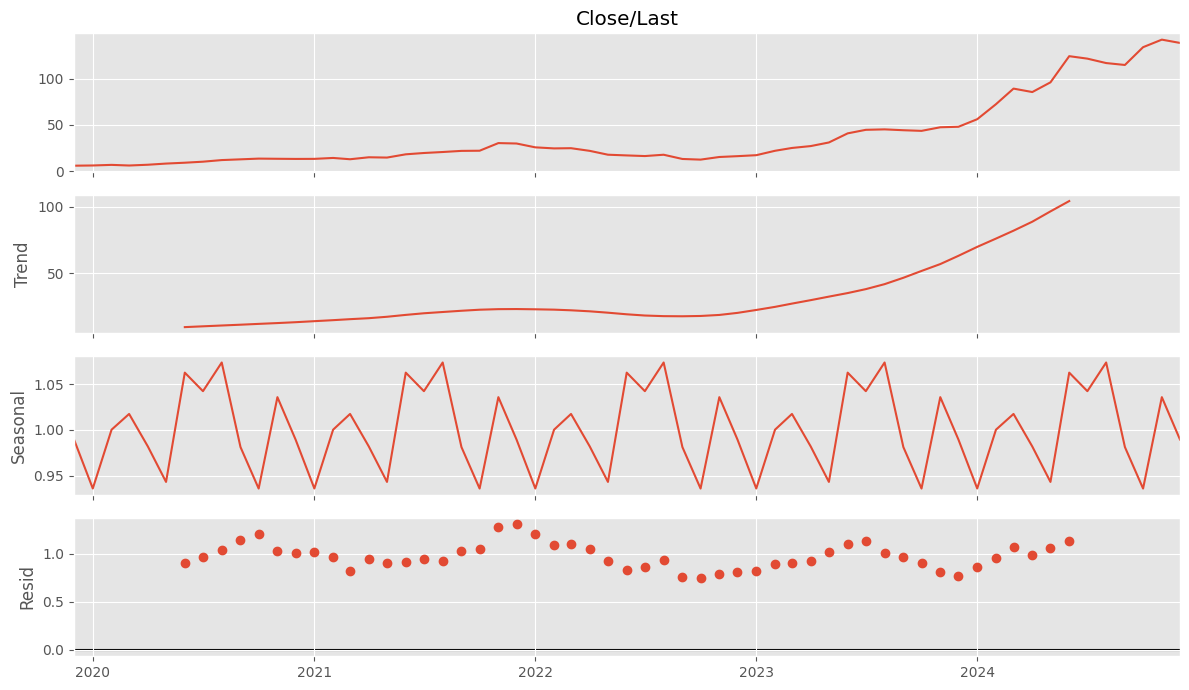

In [16]:
#Time Series Multiplicitive Decomposition
plt.rcParams['figure.figsize'] = 12,7

multiplicative_decompose = seasonal_decompose(nvda['Close/Last'],model = 'multiplicative')
multiplicative_decompose.plot()
plt.show()

In [17]:
nvda

,Close/Last
Date,
2019-12-01,5.884400
2020-01-01,6.120262
2020-02-01,6.773337
2020-03-01,6.088832
2020-04-01,6.924929
...,...
2024-08-01,117.121818
2024-09-01,115.055000
2024-10-01,134.325435


Time Series forecasting


# Training the dataset

In [18]:
train_length = 48
train_nvda = nvda[0:train_length]#First 48 months (4 years)
test_nvda = nvda[train_length:]#Last 13 months


In [19]:
print(train_nvda)
print(test_nvda)

            Close/Last
Date                  
2019-12-01    5.884400
2020-01-01    6.120262
2020-02-01    6.773337
2020-03-01    6.088832
2020-04-01    6.924929
2020-05-01    8.183810
2020-06-01    9.115764
2020-07-01   10.226555
2020-08-01   11.975090
2020-09-01   12.772971
2020-10-01   13.559759
2020-11-01   13.378950
2020-12-01   13.224764
2021-01-01   13.287884
2021-02-01   14.277289
2021-03-01   12.876143
2021-04-01   15.010319
2021-05-01   14.688225
2021-06-01   18.218695
2021-07-01   19.646352
2021-08-01   20.712182
2021-09-01   21.936571
2021-10-01   22.110429
2021-11-01   30.388524
2021-12-01   29.930727
2022-01-01   25.770250
2022-02-01   24.628947
2022-03-01   24.851652
2022-04-01   21.960700
2022-05-01   17.790571
2022-06-01   17.015905
2022-07-01   16.330400
2022-08-01   17.762261
2022-09-01   13.174429
2022-10-01   12.469810
2022-11-01   15.313571
2022-12-01   16.212429
2023-01-01   17.273300
2023-02-01   22.042632
2023-03-01   25.107435
2023-04-01   27.149316
2023-05-01 

# Forecasting methods

## Naive Method

In [20]:
#Naive method variables and functions
def naive_method(data,nforecast):
    forecast = [data[-1]]
    number = nforecast -1
    
    for i in range(number):

        forecast.append(forecast[-i])
    
    return forecast

In [21]:
#Making prediction
y_hat_naive = test_nvda.copy()
y_hat_naive['naive_forecast'] = naive_method (train_nvda['Close/Last'],nforecast = 13)

<ipython-input-20-6ee31193b12a>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast = [data[-1]]


In [22]:
y_hat_naive

,Close/Last,naive_forecast
Date,,
2023-12-01,48.070500,47.531476
2024-01-01,56.259190,47.531476
2024-02-01,72.550450,47.531476
2024-03-01,89.442525,47.531476
2024-04-01,85.703909,47.531476
2024-05-01,96.220182,47.531476
2024-06-01,124.589105,47.531476
2024-07-01,121.912727,47.531476
2024-08-01,117.121818,47.531476


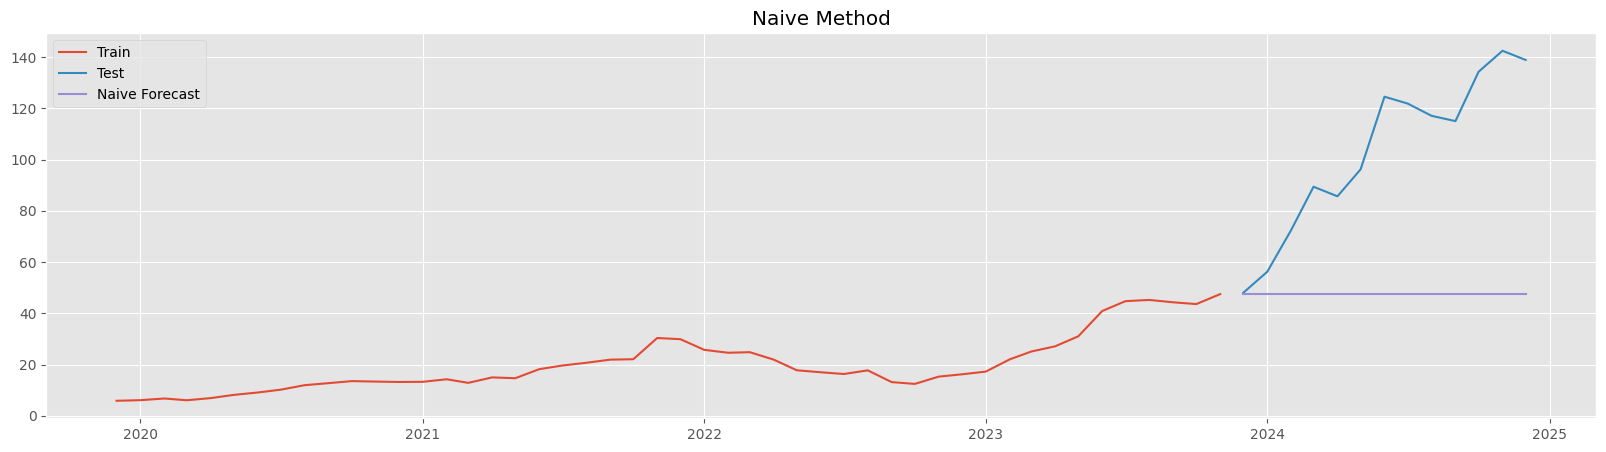

In [23]:
plt.figure(figsize=(20,5))
plt.plot(train_nvda['Close/Last'],label='Train')
plt.plot(test_nvda['Close/Last'],label='Test')
plt.plot(y_hat_naive['naive_forecast'],label='Naive Forecast')
plt.title('Naive Method')
plt.legend(loc='best')
plt.show()

In [24]:
#Accuracy metrics for naive method
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_nvda['Close/Last'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_nvda['Close/Last']-y_hat_naive['naive_forecast'])/test_nvda['Close/Last'])*100,2)
mae  = np.round(np.mean(np.abs(test_nvda['Close/Last']-y_hat_naive['naive_forecast'])),2)

results_avg = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse], 'MAE': [mae]})
results_avg = results_avg[['Method', 'RMSE', 'MAE', 'MAPE']]
results_avg

,Method,RMSE,MAE,MAPE
0,Naive method,63.29,55.75,48.55


## Average Historical Method

Average of all historical data method


In [25]:
def average_historical_method(data, nforecast):
    average = sum(data) / len(data)  
    forecast = [average] * nforecast 
    return forecast

In [26]:
#Making prediction
y_hat_average = test_nvda.copy()
y_hat_average['average_hist_forecast'] = average_historical_method(train_nvda['Close/Last'], nforecast = 13)

In [27]:
y_hat_average

,Close/Last,average_hist_forecast
Date,,
2023-12-01,48.070500,20.201092
2024-01-01,56.259190,20.201092
2024-02-01,72.550450,20.201092
2024-03-01,89.442525,20.201092
2024-04-01,85.703909,20.201092
2024-05-01,96.220182,20.201092
2024-06-01,124.589105,20.201092
2024-07-01,121.912727,20.201092
2024-08-01,117.121818,20.201092


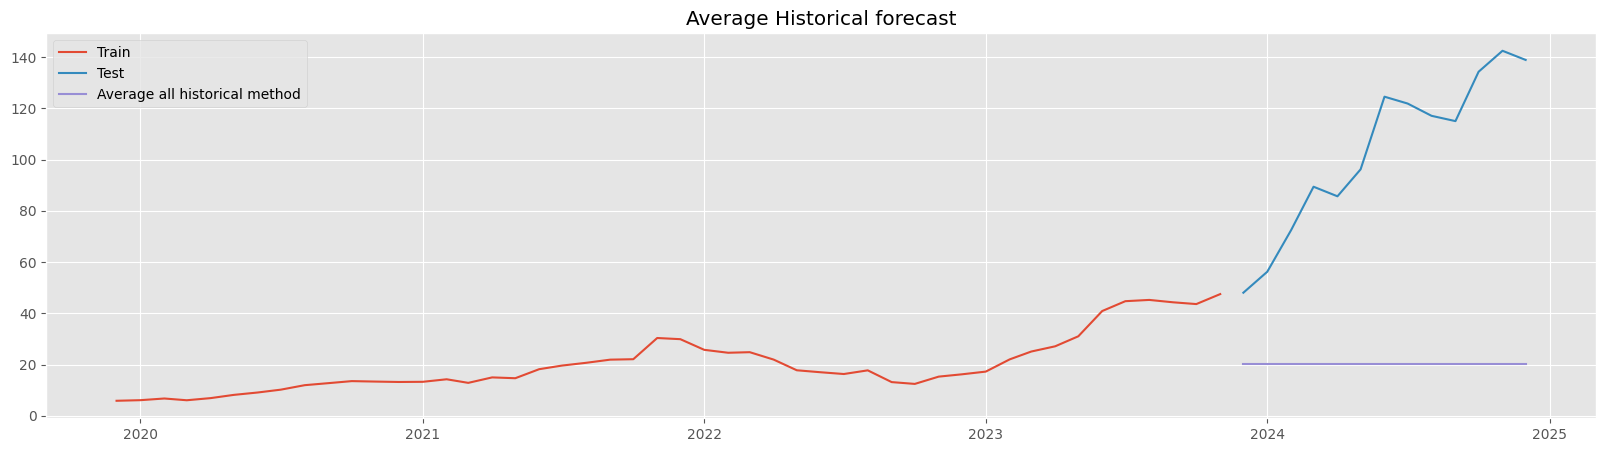

In [28]:
#Plot the table
plt.figure(figsize=(20,5))
plt.plot(train_nvda['Close/Last'],label='Train')
plt.plot(test_nvda['Close/Last'],label='Test')
plt.plot(y_hat_average['average_hist_forecast'],label='Average all historical method')
plt.title('Average Historical forecast')
plt.legend(loc='best')
plt.show()

In [29]:
#Accuracy metrics for Average all historical method
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_nvda['Close/Last'], y_hat_average['average_hist_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_nvda['Close/Last']-y_hat_average['average_hist_forecast'])/test_nvda['Close/Last'])*100,2)
mae  = np.round(np.mean(np.abs(test_nvda['Close/Last']-y_hat_average['average_hist_forecast'])),2)

results_avg = pd.DataFrame({'Method':['Average Historical'], 'MAPE': [mape], 'RMSE': [rmse], 'MAE': [mae]})
results_avg = results_avg[['Method', 'RMSE', 'MAE', 'MAPE']]
results_avg

,Method,RMSE,MAE,MAPE
0,Average Historical,88.32,83.08,78.13


## Simple Average Method

In [30]:
y_hat_avg = test_nvda.copy()

ma_window = 12
y_hat_avg['moving_avg_forecast'] = train_nvda['Close/Last'].rolling(ma_window).mean().iloc[-1]

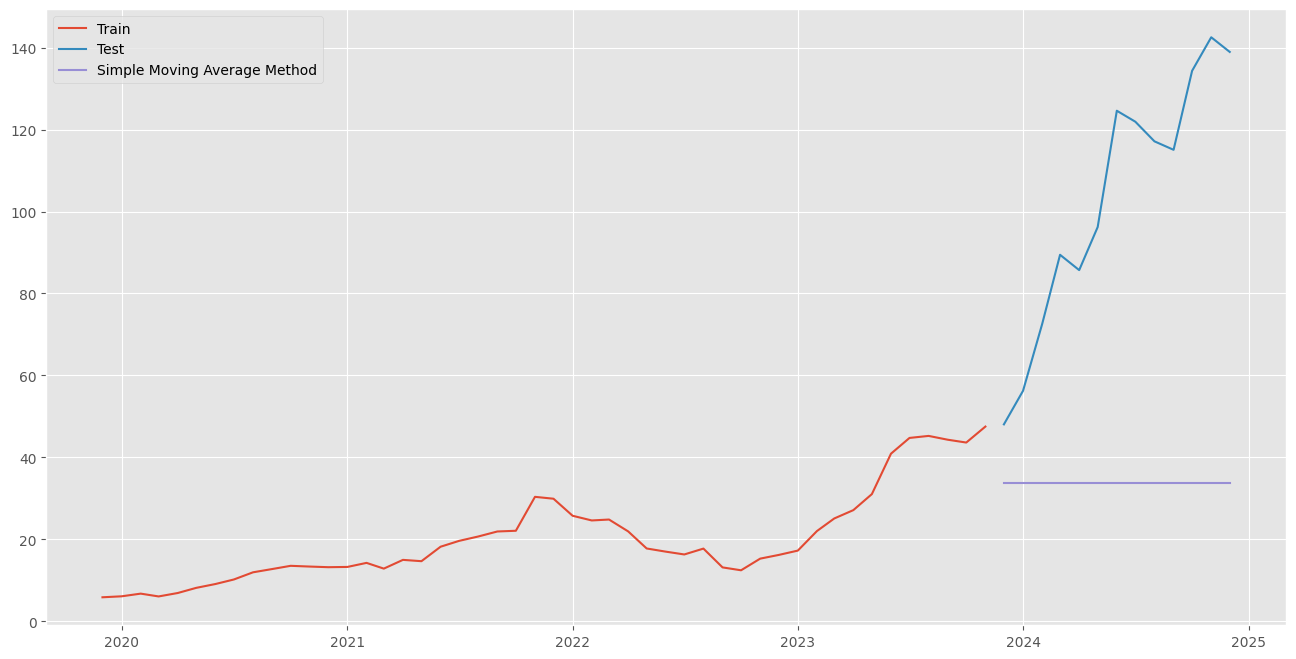

In [31]:
plt.figure(figsize=(16,8))
plt.plot(train_nvda['Close/Last'], label='Train')
plt.plot(test_nvda['Close/Last'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Simple Moving Average Method')
plt.legend(loc='best')
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test_nvda['Close/Last'], y_hat_avg['moving_avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_nvda['Close/Last'] - y_hat_avg['moving_avg_forecast']) / test_nvda['Close/Last']) * 100, 2)
mae = np.round(np.mean(np.abs(test_nvda['Close/Last'] - y_hat_avg['moving_avg_forecast'])), 2)


results = pd.DataFrame({'Method': ['Simple Moving Average'], 'RMSE': [rmse], 'MAE': [mae], 'MAPE': [mape]})
results = results[['Method', 'RMSE', 'MAE', 'MAPE']]
results

,Method,RMSE,MAE,MAPE
0,Simple Moving Average,75.69,69.51,63.44


 ## Simple Exponential Smoothing

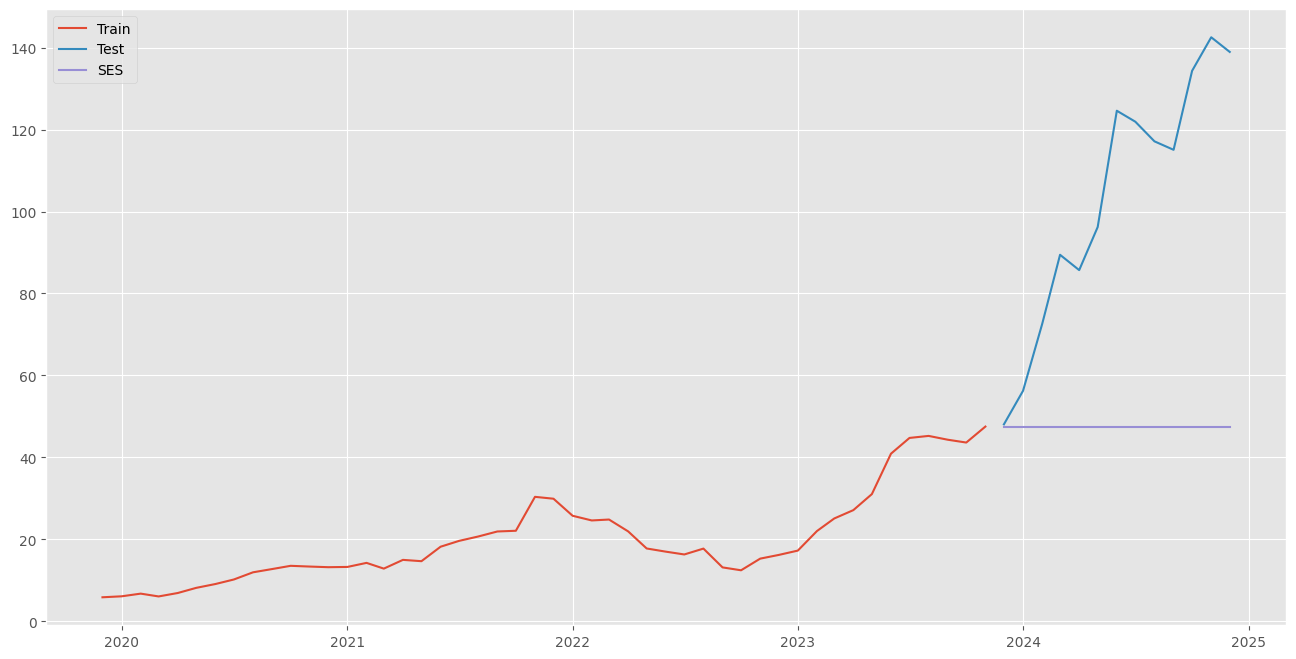

In [33]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

alpha = 0.5

y_hat_avg = test_nvda.copy()

#fit2 = SimpleExpSmoothing(np.asarray(train_nvda['Close/Last'])).fit(smoothing_level=alpha, optimized=False)
fit2 = SimpleExpSmoothing(np.asarray(train_nvda['Close/Last'])).fit() 

y_hat_avg['SES'] = fit2.forecast(len(test_nvda)) # number of forecasting equal to the test size

plt.figure(figsize=(16,8))
plt.plot(train_nvda['Close/Last'], label='Train')
plt.plot(test_nvda['Close/Last'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

Accuracy metric of Simple exponential smoothing

In [34]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test_nvda['Close/Last'], y_hat_avg['SES'])).round(2)
mape = np.round(np.mean(np.abs(test_nvda['Close/Last']-y_hat_avg['SES'])/test_nvda['Close/Last'])*100,2)
mae  = np.round(np.mean(np.abs(test_nvda['Close/Last']-y_hat_avg['SES'])),2)

results = pd.DataFrame({'Method':['SES'], 'MAPE': [mape], 'RMSE': [rmse], 'MAE': [mae]})
results= results[['Method', 'RMSE', 'MAE', 'MAPE']]
results

,Method,RMSE,MAE,MAPE
0,SES,63.29,55.75,48.55


alpha = 0.7 	Method	RMSE	MAE	MAPE
0	SES	64.26	56.86	49.74


alpha = 0.8 
Method	RMSE	MAE	MAPE
0	SES	63.95	56.5	49.36


## Holt's Linear

Holt Linear Trend

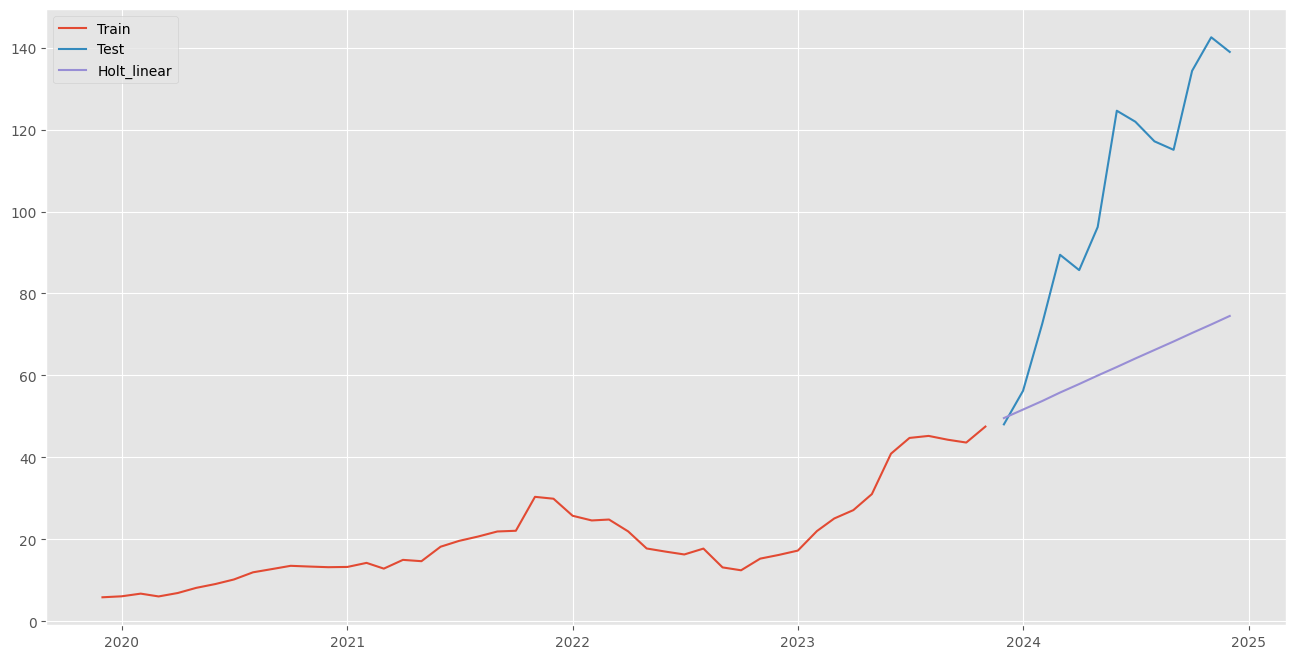

In [35]:
y_hat_avg = test_nvda.copy()

#fit1 = Holt(np.asarray(train_nvda['Close/Last'])).fit(smoothing_level = 0.1,smoothing_slope = 0.9)
fit1 = Holt(np.asarray(train_nvda['Close/Last'])).fit()
y_hat_avg['Holt_linear'] = fit1.forecast(len(test_nvda))


plt.figure(figsize=(16,8))
plt.plot(train_nvda['Close/Last'], label='Train')
plt.plot(test_nvda['Close/Last'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [36]:
fit1.params

{'smoothing_level': 0.9999999850988388,
 'smoothing_trend': 0.2527034775170174,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 5.8844,
 'initial_trend': 0.23586190476190438,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Accuracy metric of Holt Linear trend

In [37]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test_nvda['Close/Last'], y_hat_avg['Holt_linear'])).round(2)
mape = np.round(np.mean(np.abs(test_nvda['Close/Last']-y_hat_avg['Holt_linear'])/test_nvda['Close/Last'])*100,2)
mae  = np.round(np.mean(np.abs(test_nvda['Close/Last']-y_hat_avg['Holt_linear'])),2)

results = pd.DataFrame({'Method':['Holt Linear'], 'MAPE': [mape], 'RMSE': [rmse], 'MAE': [mae]})
results= results[['Method', 'RMSE', 'MAE', 'MAPE']]
results

,Method,RMSE,MAE,MAPE
0,Holt Linear,47.04,41.46,36.13


##  Holt-Winters

Holt-Winters method


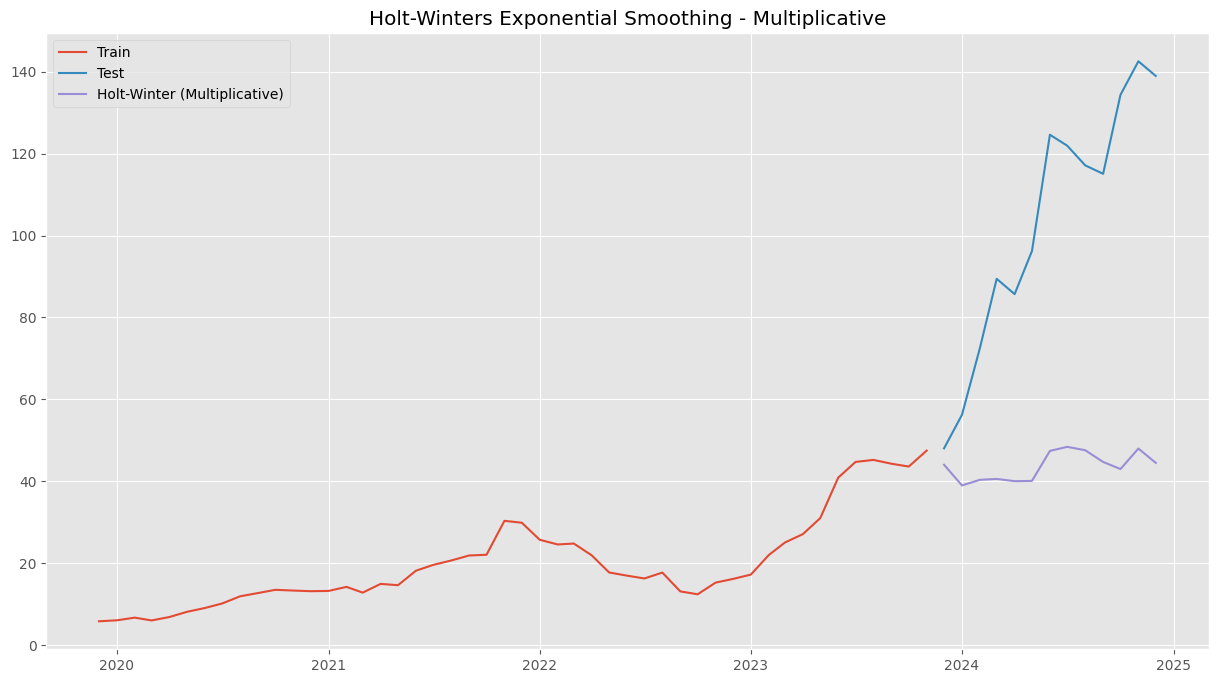

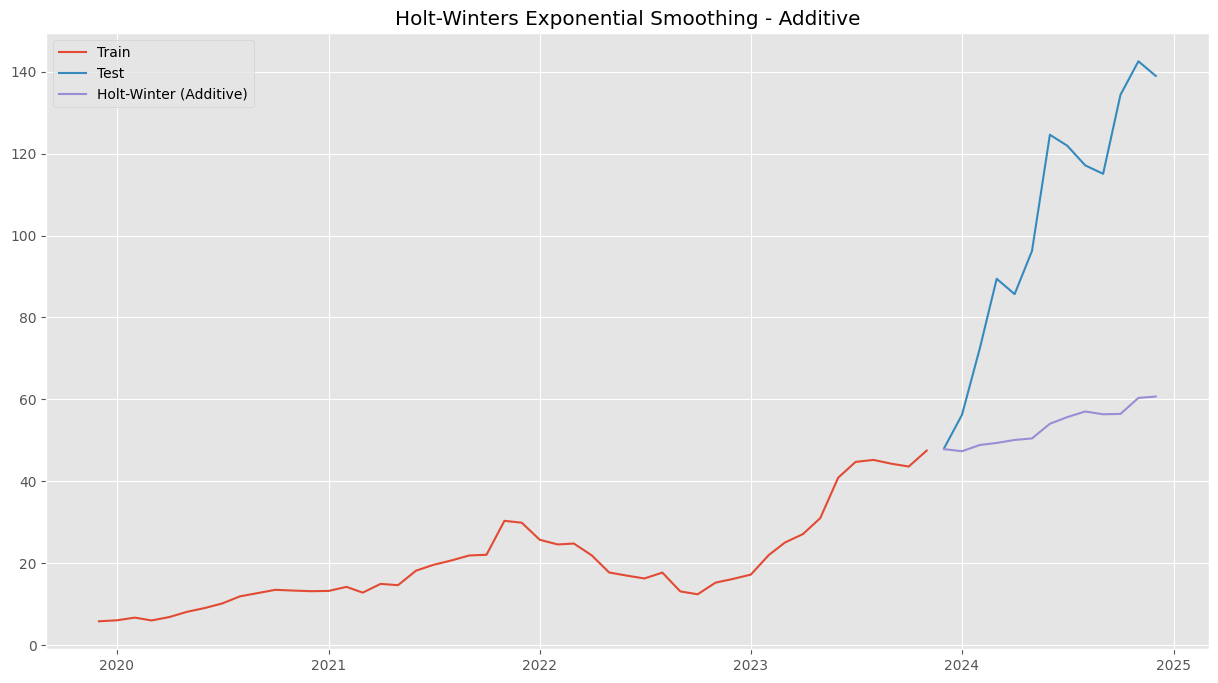

In [38]:
y_hat_avg = test_nvda.copy()


fit1 = ExponentialSmoothing(np.asarray(train_nvda['Close/Last']),seasonal_periods=12,trend='mul',seasonal='mul').fit()
y_hat_avg['Holt_Winter_Mul'] = fit1.forecast(len(test_nvda))
plt.figure(figsize=(15, 8))
plt.plot(train_nvda['Close/Last'], label='Train')
plt.plot(test_nvda['Close/Last'], label='Test')
plt.plot(y_hat_avg['Holt_Winter_Mul'], label='Holt-Winter (Multiplicative)')
plt.title('Holt-Winters Exponential Smoothing - Multiplicative')
plt.legend(loc='best')
plt.show()


fit2 = ExponentialSmoothing(np.asarray(train_nvda['Close/Last']),seasonal_periods=12,trend='add',seasonal='add').fit()
y_hat_avg['Holt_Winter_Add'] = fit2.forecast(len(test_nvda))
plt.figure(figsize=(15, 8))
plt.plot(train_nvda['Close/Last'], label='Train')
plt.plot(test_nvda['Close/Last'], label='Test')
plt.plot(y_hat_avg['Holt_Winter_Add'], label='Holt-Winter (Additive)')
plt.title('Holt-Winters Exponential Smoothing - Additive')
plt.legend(loc='best')
plt.show()

Accuracy metric of Holt Winters method

In [39]:
from sklearn.metrics import mean_squared_error
#multiplicative model
rmse_mul = np.sqrt(mean_squared_error(test_nvda['Close/Last'], y_hat_avg['Holt_Winter_Mul'])).round(2)
mape_mul = np.round(np.mean(np.abs(test_nvda['Close/Last'] - y_hat_avg['Holt_Winter_Mul']) / test_nvda['Close/Last']) * 100, 2)
mae_mul = np.round(np.mean(np.abs(test_nvda['Close/Last'] - y_hat_avg['Holt_Winter_Mul'])), 2)

#additive model
rmse_add = np.sqrt(mean_squared_error(test_nvda['Close/Last'], y_hat_avg['Holt_Winter_Add'])).round(2)
mape_add = np.round(np.mean(np.abs(test_nvda['Close/Last'] - y_hat_avg['Holt_Winter_Add']) / test_nvda['Close/Last']) * 100, 2)
mae_add = np.round(np.mean(np.abs(test_nvda['Close/Last'] - y_hat_avg['Holt_Winter_Add'])), 2)


results = pd.DataFrame({
    'Method': ['Holt-Winters (Mul)', 'Holt-Winters (Add)'],
    'RMSE': [rmse_mul, rmse_add],
    'MAE': [mae_mul, mae_add],
    'MAPE': [mape_mul, mape_add]
})

results = results[['Method', 'RMSE', 'MAE', 'MAPE']]
results

,Method,RMSE,MAE,MAPE
0,Holt-Winters (Mul),65.78,59.58,53.40
1,Holt-Winters (Add),56.11,49.83,43.67


# Time-Series Stationary Test and Differencing

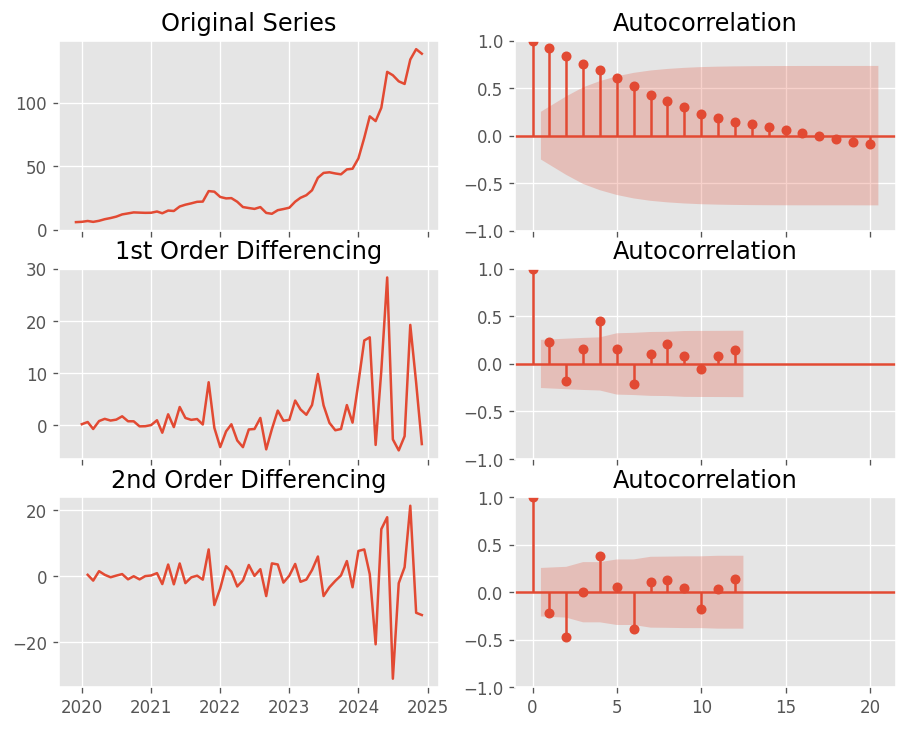

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex='col')
axes[0, 0].plot(nvda['Close/Last']); axes[0, 0].set_title('Original Series')
plot_acf(nvda['Close/Last'], lags = 20, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(nvda['Close/Last'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(nvda['Close/Last'].diff().dropna(), lags = 12, ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(nvda['Close/Last'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(nvda['Close/Last'].diff().diff().dropna(), lags = 12, ax=axes[2, 1])


plt.show()

In [41]:
#Original time series ADF test
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(nvda['Close/Last'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 2.929687
p-value: 1.000000


In [42]:
#1st order differencing time series ADF test
result = adfuller(nvda['Close/Last'].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.578951
p-value: 0.987085


In [43]:
#2nd order differencing time series ADF test
result = adfuller(nvda['Close/Last'].diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.252902
p-value: 0.000535


d = 2 (differencing value)

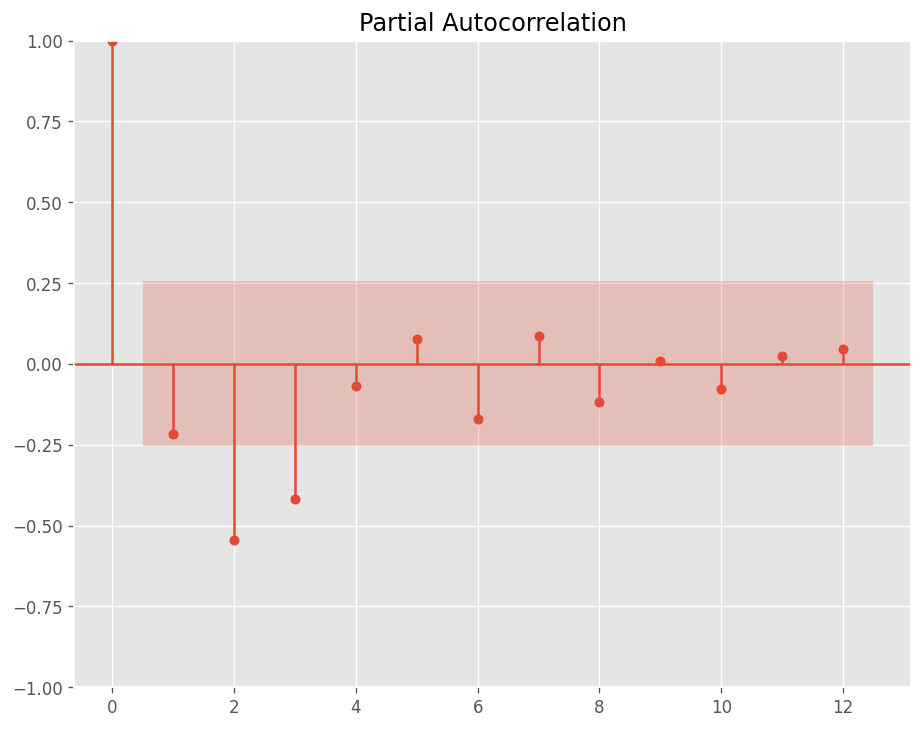

In [44]:

# Lag 2 = [p]
plot_pacf(nvda['Close/Last'].diff().diff().dropna(), lags=12)

plt.show()

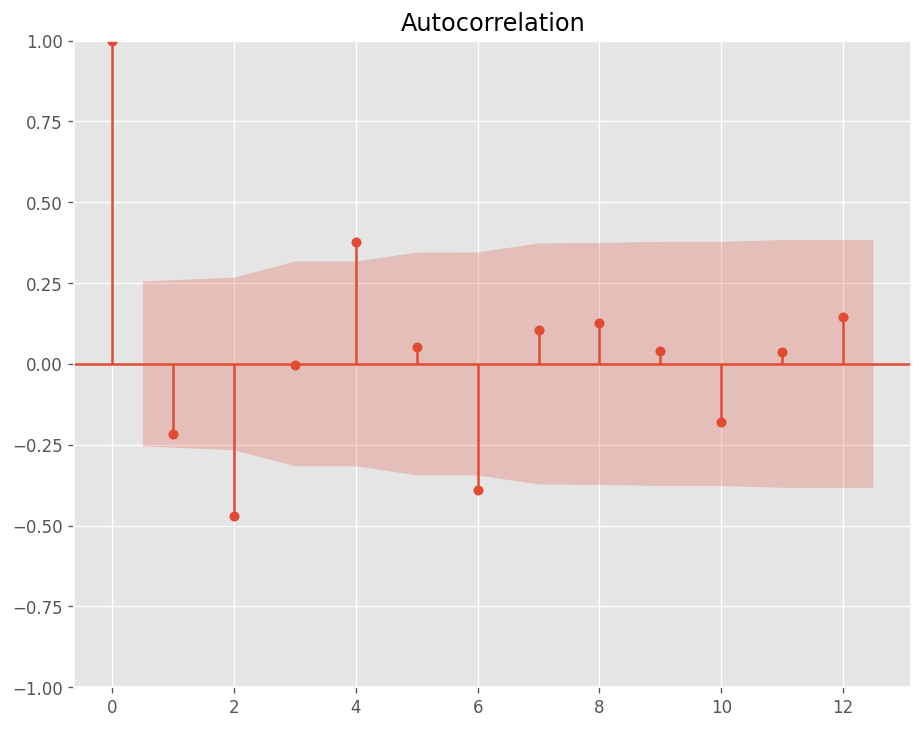

In [45]:
# ACF plot of 1st differenced series
plot_acf(nvda['Close/Last'].diff().diff().dropna(), lags = 12)

plt.show()

# lag 3 = [q]

## ARIMA 

In [46]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,1 ARIMA Model
model = ARIMA(nvda['Close/Last'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Close/Last   No. Observations:                   61
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -190.562
Date:                Thu, 15 May 2025   AIC                            387.124
Time:                        17:20:07   BIC                            393.407
Sample:                    12-01-2019   HQIC                           389.581
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4768      0.198     -2.405      0.016      -0.865      -0.088
ma.L1          0.8692      0.173      5.020      0.000       0.530       1.208
sigma2        33.2566      3.356      9.909      0.0

In [47]:
from statsmodels.tsa.arima.model import ARIMA

# 1,2,1 ARIMA Model
model = ARIMA(nvda['Close/Last'], order=(1,2,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Close/Last   No. Observations:                   61
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -188.237
Date:                Thu, 15 May 2025   AIC                            382.475
Time:                        17:20:07   BIC                            388.707
Sample:                    12-01-2019   HQIC                           384.908
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1205      0.106      1.134      0.257      -0.088       0.329
ma.L1         -0.9051      0.049    -18.603      0.000      -1.000      -0.810
sigma2        33.7077      4.010      8.407      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [48]:
# 1,3,1 ARIMA Model
model = ARIMA(nvda['Close/Last'], order=(1,3,1))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:             Close/Last   No. Observations:                   61
Model:                 ARIMA(1, 3, 1)   Log Likelihood                -199.541
Date:                Thu, 15 May 2025   AIC                            405.082
Time:                        17:20:08   BIC                            411.264
Sample:                    12-01-2019   HQIC                           407.490
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2096      0.127     -1.652      0.098      -0.458       0.039
ma.L1         -0.9997     19.328     -0.052      0.959     -38.881      36.882
sigma2        52.7484   1020.446      0.052      0.9

In [49]:
# 1,2,2 ARIMA Model
model = ARIMA(nvda['Close/Last'], order=(1,2,2))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:             Close/Last   No. Observations:                   61
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -184.932
Date:                Thu, 15 May 2025   AIC                            377.864
Time:                        17:20:08   BIC                            386.174
Sample:                    12-01-2019   HQIC                           381.108
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6071      0.158     -3.839      0.000      -0.917      -0.297
ma.L1          0.0041      0.155      0.026      0.979      -0.300       0.309
ma.L2         -0.8144      0.122     -6.697      0.0

In [50]:
# 2,1,1 ARIMA Model
model = ARIMA(nvda['Close/Last'], order=(2,1,1))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:             Close/Last   No. Observations:                   61
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -190.686
Date:                Thu, 15 May 2025   AIC                            389.371
Time:                        17:20:08   BIC                            397.749
Sample:                    12-01-2019   HQIC                           392.648
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0438      0.321     -0.137      0.891      -0.672       0.585
ar.L2         -0.0681      0.183     -0.373      0.709      -0.426       0.290
ma.L1          0.4619      0.298      1.551      0.1

In [51]:
# 2,2,2 ARIMA Model
model = ARIMA(nvda['Close/Last'], order=(2,2,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Close/Last   No. Observations:                   61
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -181.092
Date:                Thu, 15 May 2025   AIC                            372.183
Time:                        17:20:08   BIC                            382.571
Sample:                    12-01-2019   HQIC                           376.238
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1217      0.086      1.410      0.159      -0.047       0.291
ar.L2         -0.7921      0.110     -7.202      0.000      -1.008      -0.577
ma.L1         -0.7075      0.142     -4.990      0.0

In [52]:
# 2,2,1 ARIMA Model
model = ARIMA(nvda['Close/Last'], order=(2,2,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Close/Last   No. Observations:                   61
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -181.997
Date:                Thu, 15 May 2025   AIC                            371.993
Time:                        17:20:08   BIC                            380.303
Sample:                    12-01-2019   HQIC                           375.237
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0197      0.096     -0.205      0.837      -0.208       0.169
ar.L2         -0.5180      0.075     -6.933      0.000      -0.664      -0.372
ma.L1         -0.6760      0.080     -8.499      0.0

In [53]:
# 2,2,3 ARIMA Model
model = ARIMA(nvda['Close/Last'], order=(2,2,3))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Close/Last   No. Observations:                   61
Model:                 ARIMA(2, 2, 3)   Log Likelihood                -177.924
Date:                Thu, 15 May 2025   AIC                            367.848
Time:                        17:20:09   BIC                            380.313
Sample:                    12-01-2019   HQIC                           372.714
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0652      0.212     -0.307      0.759      -0.482       0.351
ar.L2         -0.9560      0.125     -7.624      0.000      -1.202      -0.710
ma.L1         -0.6619      0.314     -2.108      0.0

In [54]:
# 3,2,0 ARIMA Model
model = ARIMA(nvda['Close/Last'], order=(3,2,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Close/Last   No. Observations:                   61
Model:                 ARIMA(3, 2, 0)   Log Likelihood                -180.639
Date:                Thu, 15 May 2025   AIC                            369.278
Time:                        17:20:09   BIC                            377.588
Sample:                    12-01-2019   HQIC                           372.522
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6500      0.087     -7.446      0.000      -0.821      -0.479
ar.L2         -0.7752      0.067    -11.593      0.000      -0.906      -0.644
ar.L3         -0.4980      0.097     -5.129      0.0

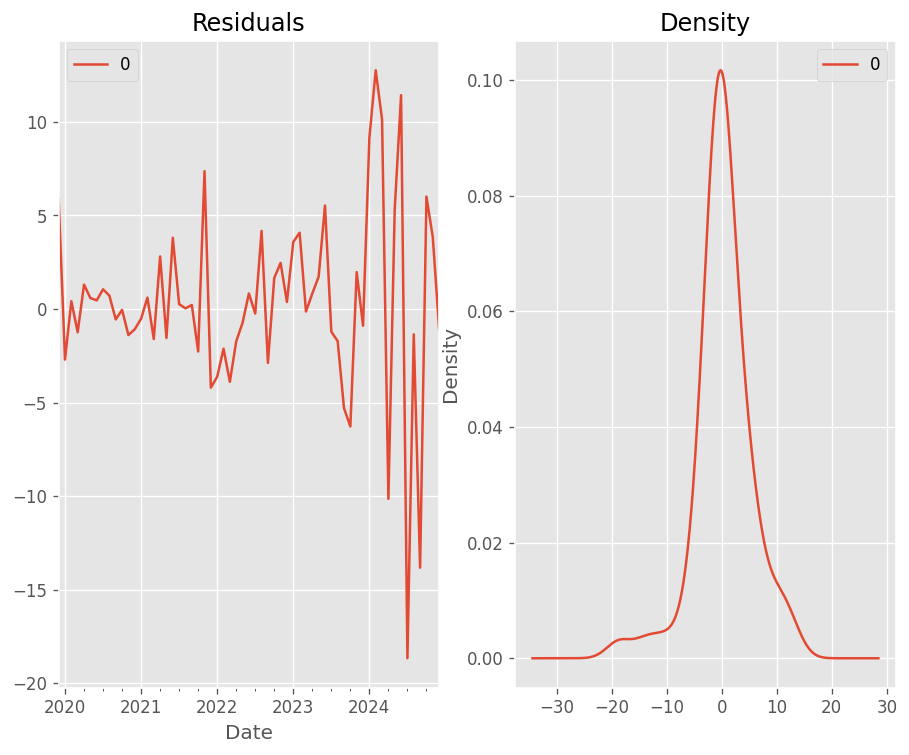

In [55]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [56]:
total = len(nvda)
aaa = 12
hist = total - aaa
hist

49

In [57]:
from statsmodels.tsa.stattools import acf

total = len(nvda)
num_obs_ahead = 12 # 12 months
dif = total - num_obs_ahead

# Create Training and Test
train = nvda['Close/Last'][:dif]
test = nvda['Close/Last'][dif:]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


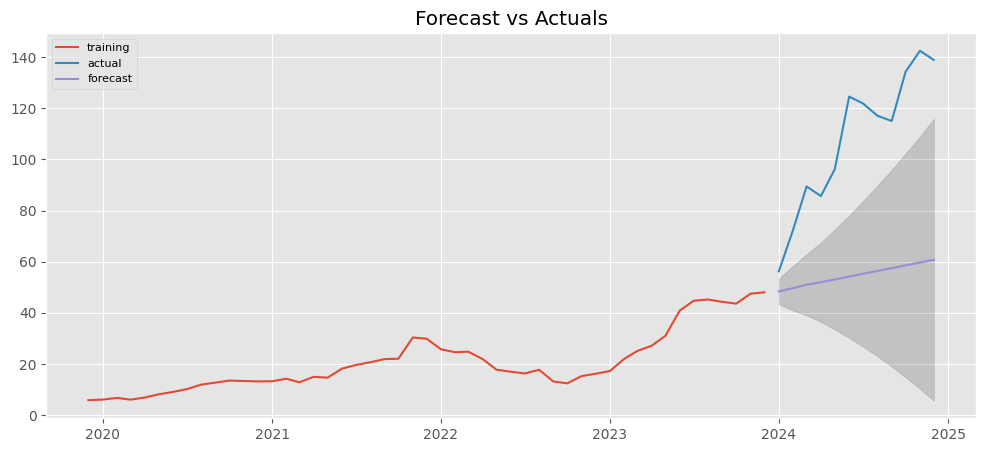

In [58]:
# Build Model
#model = ARIMA(train, order=(3,2,1))  
#model = ARIMA(train, order=(3, 1, 4))  
#model = ARIMA(train, order=(1, 2, 2))   
#model = ARIMA(train, order=(2, 2, 2))  
model = ARIMA(train, order=(2, 2, 1))  
#model = ARIMA(train, order=(2, 2, 3)) 
#model = ARIMA(train, order=(3, 2, 0)) 
fitted = model.fit()  


# Forecast
fc = fitted.forecast(num_obs_ahead, alpha=0.05)  # 95% conf
conf_ins = fitted.get_forecast(num_obs_ahead).summary_frame()

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf_ins['mean_ci_lower'], index=test.index)
upper_series = pd.Series(conf_ins['mean_ci_upper'], index=test.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [59]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc.values, test.values)

{'mape': 0.46352547808392547,
 'me': -53.15463284739915,
 'mae': 53.15463284739915,
 'mpe': -0.46352547808392547,
 'rmse': 57.83588617483867,
 'acf1': 0.6422505619919445,
 'corr': 0.9457220805731057,
 'minmax': 0.4635254780839254}

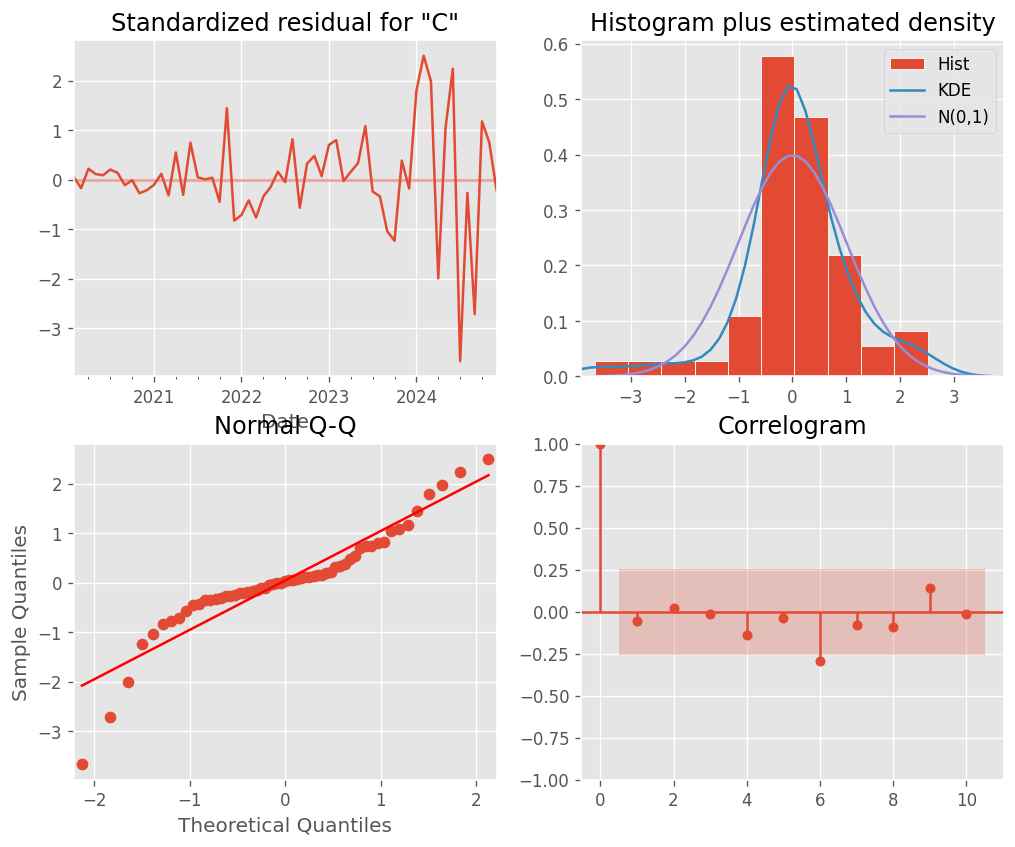

In [60]:
model_fit.plot_diagnostics(figsize=(10,8))
plt.show()

## SARIMA 

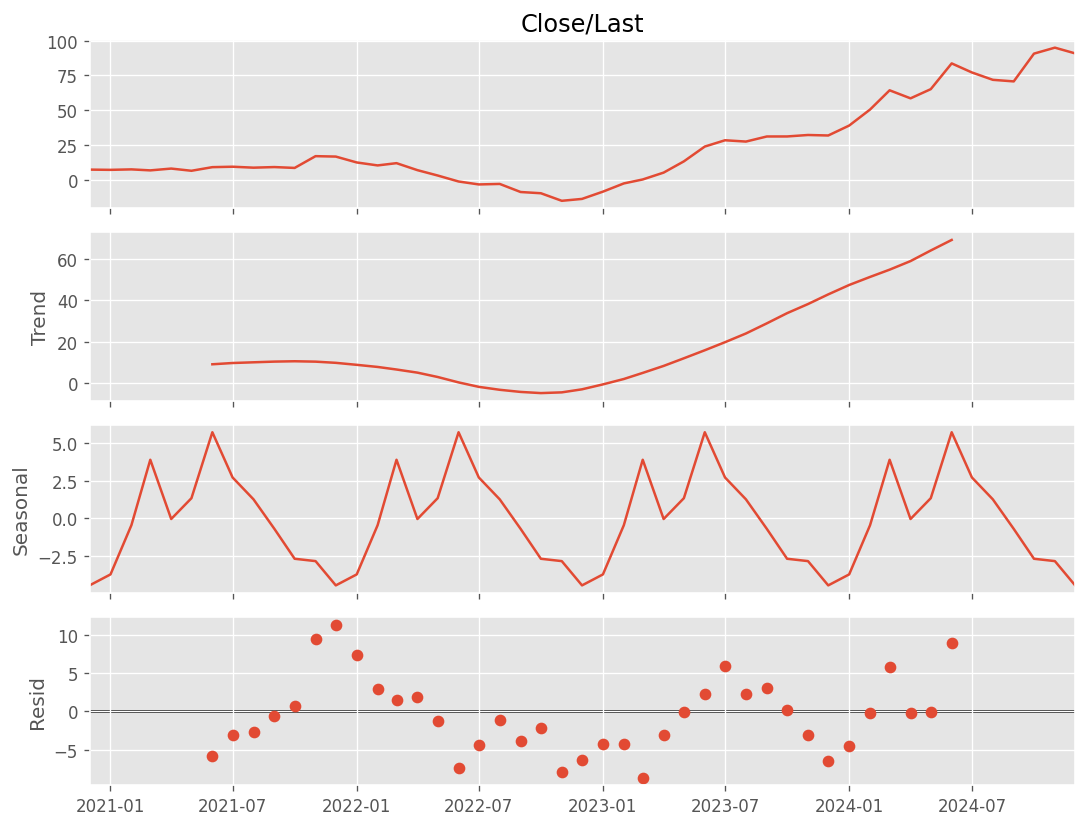

In [61]:
import statsmodels.api as sm
#import statsmodels.tsa.api as smt

data_diff_seas =  nvda['Close/Last'].diff(12).dropna()
dec = sm.tsa.seasonal_decompose(data_diff_seas,period = 12)
dec.plot()
plt.show()

In [62]:
# Fit the SARIMA model
modsar = sm.tsa.statespace.SARIMAX( nvda['Close/Last'], order=(1,1,1), seasonal_order=(2,1,1,12))
modsar_fit = modsar.fit()
print(modsar_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                      
Dep. Variable:                         Close/Last   No. Observations:                   61
Model:             SARIMAX(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -152.177
Date:                            Thu, 15 May 2025   AIC                            316.354
Time:                                    17:20:15   BIC                            327.581
Sample:                                12-01-2019   HQIC                           320.597
                                     - 12-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6416      0.257     -2.501      0.012      -1.144      -0.139
ma.L1          0.9998     37.842   

In [63]:
# Fit the SARIMA model
modsar = sm.tsa.statespace.SARIMAX( nvda['Close/Last'], order=(1,1,1), seasonal_order=(2,0,1,12))
modsar_fit = modsar.fit()
print(modsar_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                                     SARIMAX Results                                      
Dep. Variable:                         Close/Last   No. Observations:                   61
Model:             SARIMAX(1, 1, 1)x(2, 0, 1, 12)   Log Likelihood                -187.786
Date:                            Thu, 15 May 2025   AIC                            387.571
Time:                                    17:20:16   BIC                            400.138
Sample:                                12-01-2019   HQIC                           392.487
                                     - 12-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6186      0.200     -3.089      0.002      -1.011      -0.226
ma.L1          0.9438      0.115   

In [64]:
# Fit the SARIMA model
modsar = sm.tsa.statespace.SARIMAX( nvda['Close/Last'], order=(1,1,1), seasonal_order=(0,1,1,12))
modsar_fit = modsar.fit()
print(modsar_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                      
Dep. Variable:                         Close/Last   No. Observations:                   61
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -152.197
Date:                            Thu, 15 May 2025   AIC                            312.393
Time:                                    17:20:17   BIC                            319.878
Sample:                                12-01-2019   HQIC                           315.222
                                     - 12-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6499      0.238     -2.734      0.006      -1.116      -0.184
ma.L1          0.9996     15.558   

In [65]:
# Fit the SARIMA model
modsar = sm.tsa.statespace.SARIMAX( nvda['Close/Last'], order=(1,1,1), seasonal_order=(0,0,1,12))
modsar_fit = modsar.fit()
print(modsar_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Close/Last   No. Observations:                   61
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood                -188.229
Date:                            Thu, 15 May 2025   AIC                            384.457
Time:                                    17:20:17   BIC                            392.835
Sample:                                12-01-2019   HQIC                           387.734
                                     - 12-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6343      0.134     -4.745      0.000      -0.896      -0.372
ma.L1          0.9353      0.102   

In [66]:
# Fit the SARIMA model
modsar = sm.tsa.statespace.SARIMAX( nvda['Close/Last'], order=(2,2,1), seasonal_order=(0,1,1,12))
modsar_fit = modsar.fit()
print(modsar_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                      
Dep. Variable:                         Close/Last   No. Observations:                   61
Model:             SARIMAX(2, 2, 1)x(0, 1, 1, 12)   Log Likelihood                -148.487
Date:                            Thu, 15 May 2025   AIC                            306.974
Time:                                    17:20:17   BIC                            316.225
Sample:                                12-01-2019   HQIC                           310.455
                                     - 12-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0120      0.148      0.081      0.935      -0.279       0.303
ar.L2         -0.4274      0.127   

In [67]:
#(2,2,3)(0,1,0,12) 
modsar_refit = sm.tsa.statespace.SARIMAX(nvda['Close/Last'], order=(2, 2, 3), seasonal_order=(0, 1, 0, 12))
modsar_refit_fit = modsar_refit.fit()
print(modsar_refit_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                          Close/Last   No. Observations:                   61
Model:             SARIMAX(2, 2, 3)x(0, 1, [], 12)   Log Likelihood                -145.320
Date:                             Thu, 15 May 2025   AIC                            302.640
Time:                                     17:20:18   BIC                            313.741
Sample:                                 12-01-2019   HQIC                           306.817
                                      - 12-01-2024                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0556      0.232      0.240      0.811      -0.399       0.510
ar.L2         -0.9335      

In [68]:
#(0,2,0)(0,1,0,12)
modsar_refit_simplified = sm.tsa.statespace.SARIMAX(nvda['Close/Last'], order=(0, 2, 0), seasonal_order=(0, 1, 0, 12))
modsar_refit_fit_simplified = modsar_refit_simplified.fit()
print(modsar_refit_fit_simplified.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Close/Last   No. Observations:                   61
Model:             SARIMAX(0, 2, 0)x(0, 1, 0, 12)   Log Likelihood                -162.190
Date:                            Thu, 15 May 2025   AIC                            326.381
Time:                                    17:20:18   BIC                            328.231
Sample:                                12-01-2019   HQIC                           327.077
                                     - 12-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        58.1975      8.012      7.264      0.000      42.495      73.900
Ljung-Box (L1) (Q):                

In [69]:
#(3,2,0)(0,1,0,12) 
modsar_refit = sm.tsa.statespace.SARIMAX(nvda['Close/Last'], order=(3, 2, 0), seasonal_order=(0, 1, 0, 12))
modsar_refit_fit = modsar_refit.fit()
print(modsar_refit_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Close/Last   No. Observations:                   61
Model:             SARIMAX(3, 2, 0)x(0, 1, 0, 12)   Log Likelihood                -147.290
Date:                            Thu, 15 May 2025   AIC                            302.580
Time:                                    17:20:18   BIC                            309.981
Sample:                                12-01-2019   HQIC                           305.365
                                     - 12-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6798      0.150     -4.522      0.000      -0.974      -0.385
ar.L2         -0.7298      0.119   

In [70]:
#(3,2,0)(0,2,0,12) - best result so far
modsar_refit = sm.tsa.statespace.SARIMAX(nvda['Close/Last'], order=(3, 2, 0), seasonal_order=(0, 2, 0, 12))
modsar_refit_fit = modsar_refit.fit()
print(modsar_refit_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Close/Last   No. Observations:                   61
Model:             SARIMAX(3, 2, 0)x(0, 2, 0, 12)   Log Likelihood                -120.374
Date:                            Thu, 15 May 2025   AIC                            248.748
Time:                                    17:20:19   BIC                            254.969
Sample:                                12-01-2019   HQIC                           250.896
                                     - 12-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7287      0.199     -3.653      0.000      -1.120      -0.338
ar.L2         -0.6078      0.250   

In [71]:
#(3,2,0)(1,2,0,12) 
modsar_refit = sm.tsa.statespace.SARIMAX(nvda['Close/Last'], order=(3, 2, 0), seasonal_order=(1, 2, 0, 12))
modsar_refit_fit = modsar_refit.fit()
print(modsar_refit_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Close/Last   No. Observations:                   61
Model:             SARIMAX(3, 2, 0)x(1, 2, 0, 12)   Log Likelihood                -117.373
Date:                            Thu, 15 May 2025   AIC                            244.747
Time:                                    17:20:19   BIC                            252.523
Sample:                                12-01-2019   HQIC                           247.431
                                     - 12-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6107      0.190     -3.221      0.001      -0.982      -0.239
ar.L2         -0.6992      0.184   

In [72]:
modsar_refit = sm.tsa.statespace.SARIMAX(nvda['Close/Last'], order=(3, 2, 1), seasonal_order=(0, 2, 0, 12))
modsar_refit_fit = modsar_refit.fit()
print(modsar_refit_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                          Close/Last   No. Observations:                   61
Model:             SARIMAX(3, 2, 1)x(0, 2, [], 12)   Log Likelihood                -120.182
Date:                             Thu, 15 May 2025   AIC                            250.365
Time:                                     17:20:20   BIC                            258.141
Sample:                                 12-01-2019   HQIC                           253.049
                                      - 12-01-2024                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5824      0.484     -1.203      0.229      -1.531       0.367
ar.L2         -0.5203      

### Plot residual errors

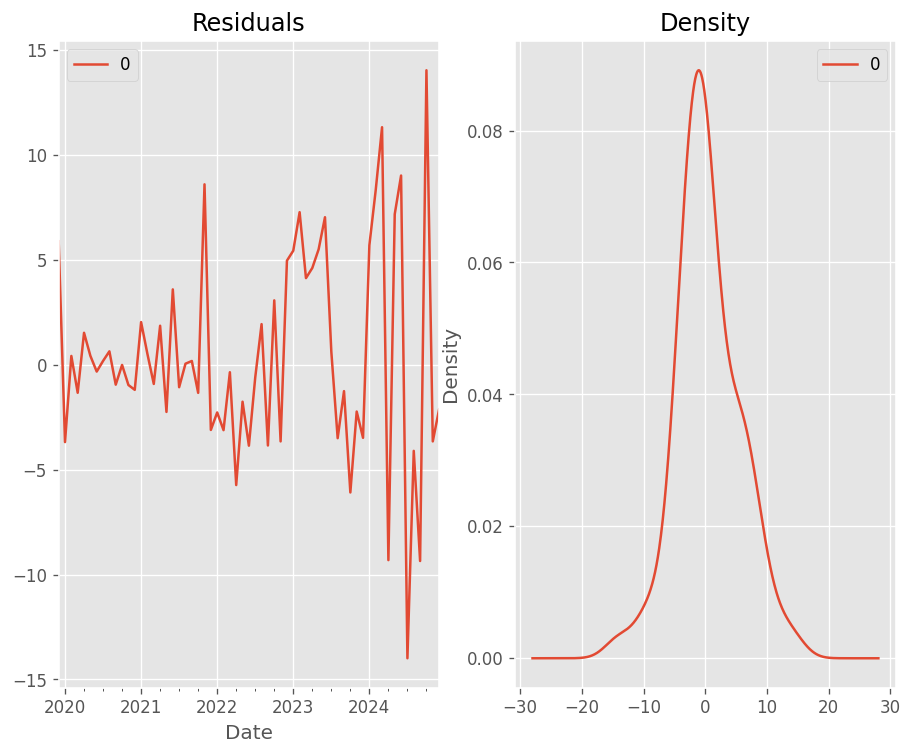

In [73]:
# Plot residual errors
residuals_sar = pd.DataFrame(modsar_fit.resid)
fig, ax = plt.subplots(1,2)
residuals_sar.plot(title="Residuals", ax=ax[0])
residuals_sar.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

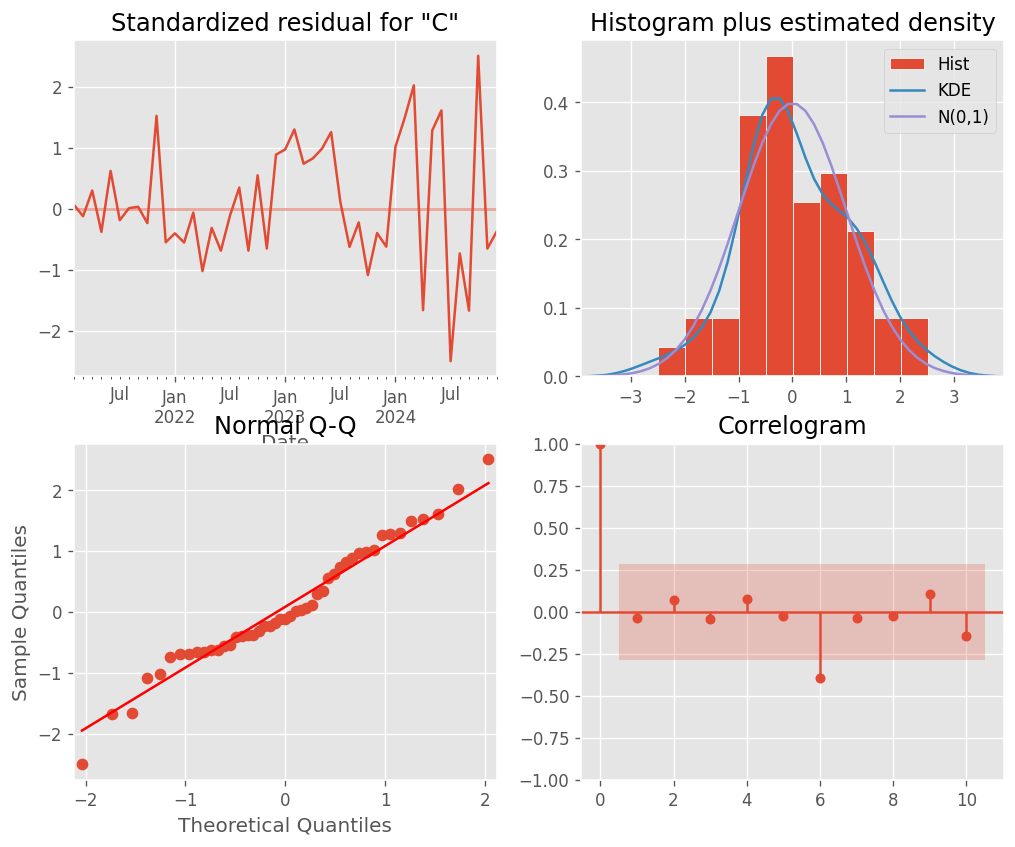

In [74]:
modsar_fit.plot_diagnostics(figsize=(10,8))
plt.show()

### Forecasting

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


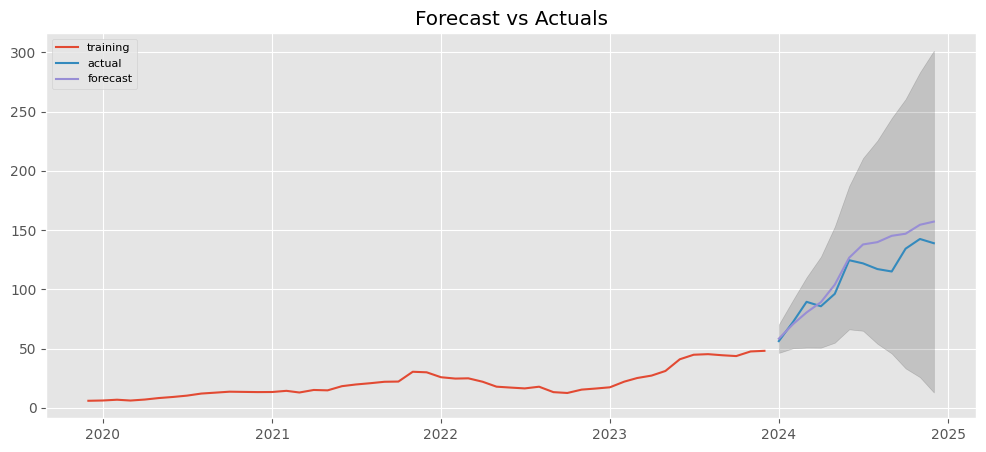

In [75]:
modsar = ARIMA(train, order=(3, 2,1), seasonal_order=(0,2,0,12)) 
fitted_sar = modsar.fit()  


# Forecast
fc_sar = fitted_sar.forecast(num_obs_ahead, alpha=0.05)  # 95% conf
conf_ins = fitted_sar.get_forecast(num_obs_ahead).summary_frame()

# Make as pandas series
fc_series = pd.Series(fc_sar, index=test.index)
lower_series = pd.Series(conf_ins['mean_ci_lower'], index=test.index)
upper_series = pd.Series(conf_ins['mean_ci_upper'], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [76]:
forecast_accuracy(fc_sar.values, test.values)

{'mape': 0.09968912254416439,
 'me': 9.687735614409505,
 'mae': 11.488945071419906,
 'mpe': 0.0787582261293473,
 'rmse': 14.377741029328327,
 'acf1': 0.6422505619919445,
 'corr': 0.9665766796571157,
 'minmax': 0.08801719115384554}

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


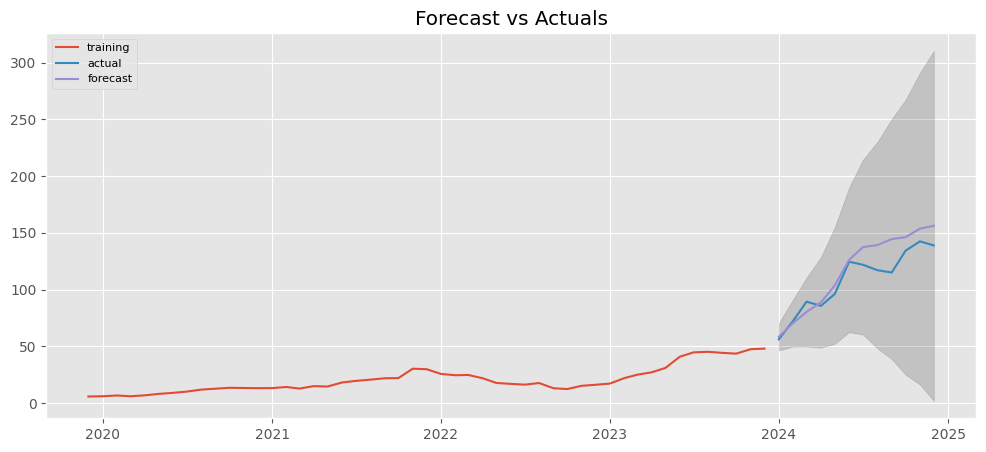

In [77]:
modsar = ARIMA(train, order=(3, 2, 0), seasonal_order=(0,2,0,12)) 
fitted_sar = modsar.fit()  


# Forecast
fc_sar = fitted_sar.forecast(num_obs_ahead, alpha=0.05)  # 95% conf
conf_ins = fitted_sar.get_forecast(num_obs_ahead).summary_frame()

# Make as pandas series
fc_series = pd.Series(fc_sar, index=test.index)
lower_series = pd.Series(conf_ins['mean_ci_lower'], index=test.index)
upper_series = pd.Series(conf_ins['mean_ci_upper'], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [78]:
forecast_accuracy(fc_sar.values, test.values)

{'mape': 0.09647020769756592,
 'me': 9.247775724871333,
 'mae': 11.071921540063485,
 'mpe': 0.07525674672620263,
 'rmse': 13.914097113532156,
 'acf1': 0.6422505619919445,
 'corr': 0.966484124827751,
 'minmax': 0.0854829404293963}

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


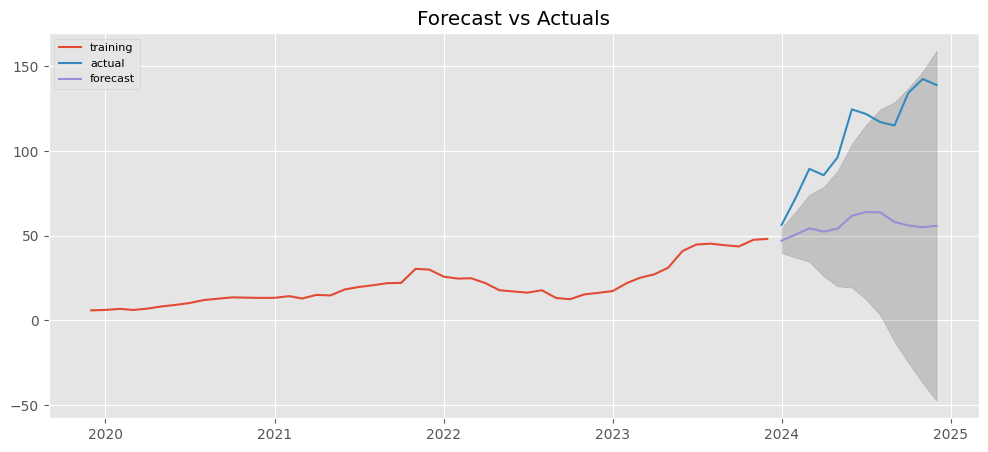

In [79]:
modsar = ARIMA(train, order=(3, 2, 0), seasonal_order=(1,2,0,12)) 
fitted_sar = modsar.fit()  


# Forecast
fc_sar = fitted_sar.forecast(num_obs_ahead, alpha=0.05)  # 95% conf
conf_ins = fitted_sar.get_forecast(num_obs_ahead).summary_frame()

# Make as pandas series
fc_series = pd.Series(fc_sar, index=test.index)
lower_series = pd.Series(conf_ins['mean_ci_lower'], index=test.index)
upper_series = pd.Series(conf_ins['mean_ci_upper'], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [80]:
forecast_accuracy(fc_sar.values, test.values)

{'mape': 0.45089602258890876,
 'me': -51.815490974504094,
 'mae': 51.815490974504094,
 'mpe': -0.45089602258890876,
 'rmse': 56.85713924954087,
 'acf1': 0.6422505619919445,
 'corr': 0.6660698890197545,
 'minmax': 0.4508960225889088}

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


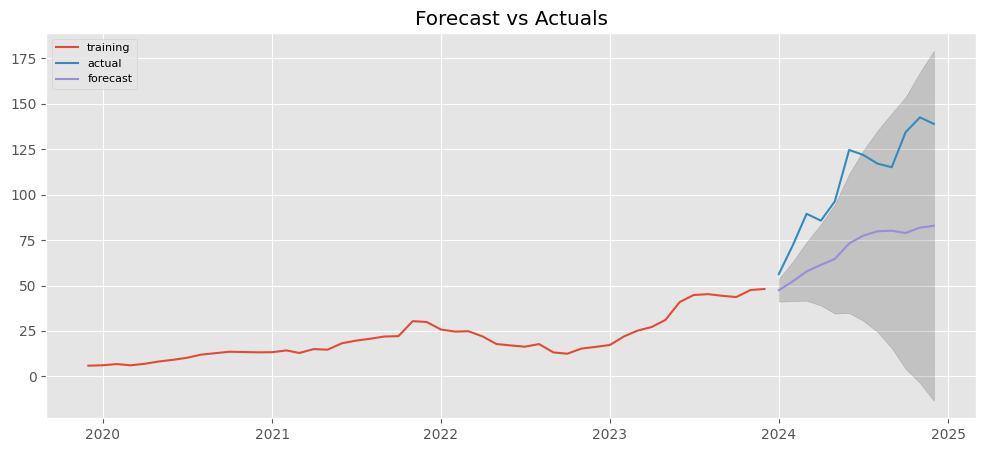

In [81]:
# Build the SARIMA model
modsar = ARIMA(train, order=(2, 2, 3), seasonal_order=(0,1,0,12))  
fitted_sar = modsar.fit()  


# Forecast
fc_sar = fitted_sar.forecast(num_obs_ahead, alpha=0.05)  # 95% conf
conf_ins = fitted_sar.get_forecast(num_obs_ahead).summary_frame()

# Make as pandas series
fc_series = pd.Series(fc_sar, index=test.index)
lower_series = pd.Series(conf_ins['mean_ci_lower'], index=test.index)
upper_series = pd.Series(conf_ins['mean_ci_upper'], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [82]:
forecast_accuracy(fc_sar.values, test.values)

{'mape': 0.3370411315139778,
 'me': -38.08850403156417,
 'mae': 38.08850403156417,
 'mpe': -0.3370411315139778,
 'rmse': 41.05178622150431,
 'acf1': 0.6422505619919445,
 'corr': 0.9575481496844163,
 'minmax': 0.33704113151397797}

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


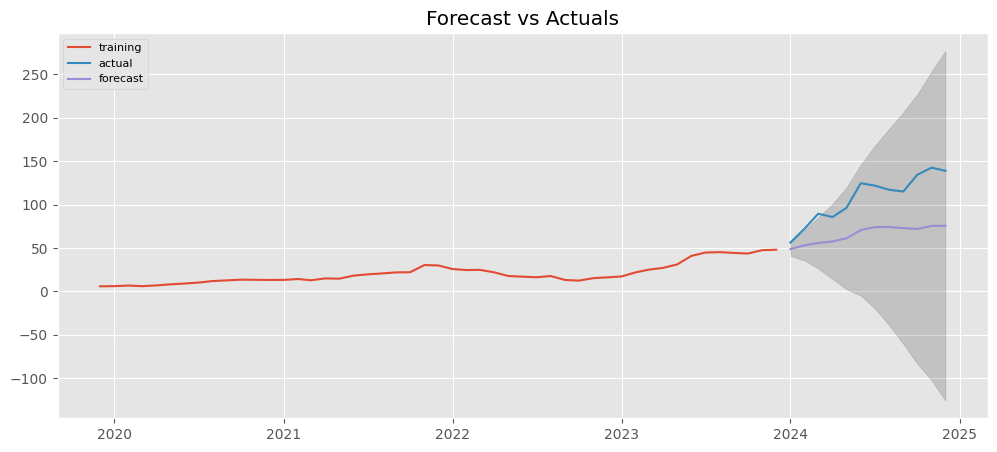

In [83]:
# Build the SARIMA model (0,2,0)(0,1,0,12)
modsar = ARIMA(train, order=(0, 2, 0), seasonal_order=(0,1,0,12))  
fitted_sar = modsar.fit()  


# Forecast
fc_sar = fitted_sar.forecast(num_obs_ahead, alpha=0.05)  # 95% conf
conf_ins = fitted_sar.get_forecast(num_obs_ahead).summary_frame()

# Make as pandas series
fc_series = pd.Series(fc_sar, index=test.index)
lower_series = pd.Series(conf_ins['mean_ci_lower'], index=test.index)
upper_series = pd.Series(conf_ins['mean_ci_upper'], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [84]:
forecast_accuracy(fc_sar.values, test.values)

{'mape': 0.3680979612490555,
 'me': -41.939209987576994,
 'mae': 41.939209987576994,
 'mpe': -0.3680979612490555,
 'rmse': 45.46069768679975,
 'acf1': 0.6422505619919445,
 'corr': 0.9566187337304596,
 'minmax': 0.36809796124905547}

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


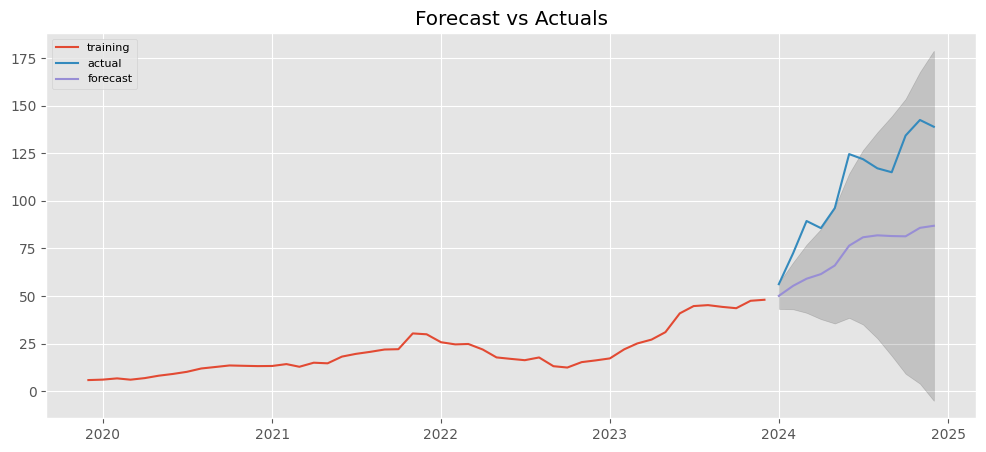

In [85]:
modsar = ARIMA(train, order=(3, 2, 0), seasonal_order=(0,1,0,12))  
fitted_sar = modsar.fit()  


# Forecast
fc_sar = fitted_sar.forecast(num_obs_ahead, alpha=0.05)  # 95% conf
conf_ins = fitted_sar.get_forecast(num_obs_ahead).summary_frame()

# Make as pandas series
fc_series = pd.Series(fc_sar, index=test.index)
lower_series = pd.Series(conf_ins['mean_ci_lower'], index=test.index)
upper_series = pd.Series(conf_ins['mean_ci_upper'], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [86]:
forecast_accuracy(fc_sar.values, test.values)

{'mape': 0.3133635625212526,
 'me': -35.614905621005995,
 'mae': 35.614905621005995,
 'mpe': -0.3133635625212526,
 'rmse': 38.53656536797739,
 'acf1': 0.6422505619919445,
 'corr': 0.9666163755256701,
 'minmax': 0.3133635625212525}